# **Présentation de notre projet**

In [478]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm

In [696]:
nombre_patient = 500
nombre_docteur = 100

In [697]:
def position (n):
    return (np.random.uniform(0,1,size = (n)), np.random.uniform(0,1,size = (n)))
    

In [698]:
position_docteur = position(nombre_docteur)
position_patient = position(nombre_patient)
position_docteur

(array([0.28570071, 0.15556419, 0.51945202, 0.84181546, 0.3220328 ,
        0.22439897, 0.42490074, 0.69252634, 0.75828727, 0.59425384,
        0.79956446, 0.5212497 , 0.83513023, 0.54450539, 0.7000391 ,
        0.97051498, 0.3468657 , 0.43457626, 0.79215617, 0.24797849,
        0.18313297, 0.66768938, 0.50852238, 0.21634145, 0.68845764,
        0.64275708, 0.93554936, 0.79520857, 0.50751727, 0.16082672,
        0.92032144, 0.54355329, 0.86618969, 0.65773946, 0.79740556,
        0.23010075, 0.14648561, 0.46998849, 0.07480875, 0.66067191,
        0.08049648, 0.55129989, 0.70876738, 0.18780186, 0.27488779,
        0.24917566, 0.80830092, 0.58433034, 0.41993242, 0.62379008,
        0.54498552, 0.75884647, 0.31120895, 0.34508095, 0.51452716,
        0.3275523 , 0.06114916, 0.61162881, 0.70313308, 0.8710245 ,
        0.79517009, 0.5703256 , 0.13878241, 0.13227474, 0.19815713,
        0.42046024, 0.66028261, 0.28188492, 0.10251634, 0.48995278,
        0.69188702, 0.31163849, 0.04300478, 0.11

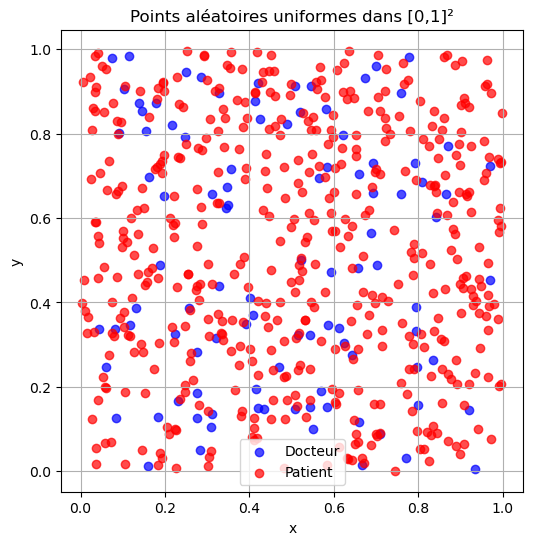

In [699]:
#On représente les points sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [700]:
matrice_distance = np.zeros((nombre_patient, nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        matrice_distance[i,j] = np.sqrt((position_patient[1][i]-position_docteur[1][j])**2+(position_patient[0][i]-position_docteur[0][j])**2)
matrice_distance

array([[0.74358135, 0.79617155, 0.50965246, ..., 0.50119685, 0.3774796 ,
        0.70496474],
       [0.63676929, 0.48758923, 0.6681225 , ..., 0.29944627, 0.61808712,
        0.2936428 ],
       [0.72308453, 0.69485522, 0.56479159, ..., 0.23127016, 0.42682435,
        0.37139529],
       ...,
       [0.4701722 , 0.55197955, 0.22843483, ..., 0.44742055, 0.11588646,
        0.72011803],
       [0.76161558, 0.62303808, 0.76082772, ..., 0.31495126, 0.68813633,
        0.17537099],
       [0.75103193, 0.78071204, 0.53293183, ..., 0.42944211, 0.39106935,
        0.61293827]], shape=(500, 100))

In [701]:
#On calcule maintenant alpha_i et psi_j
alpha = np.random.randint(0,3,size=nombre_patient)/10
psi = np.random.randint(0,3,size=nombre_docteur)/10
alpha,psi

(array([0.1, 0. , 0. , 0. , 0.2, 0.2, 0.1, 0. , 0. , 0. , 0.2, 0.1, 0. ,
        0. , 0. , 0.2, 0. , 0.1, 0.1, 0.2, 0.1, 0.1, 0. , 0.2, 0. , 0. ,
        0.1, 0.2, 0.2, 0. , 0.1, 0.2, 0.1, 0.1, 0. , 0. , 0.1, 0. , 0.1,
        0.1, 0.1, 0.2, 0.2, 0.2, 0.2, 0.1, 0.1, 0. , 0. , 0.1, 0.2, 0.2,
        0.1, 0.1, 0.2, 0.2, 0.1, 0. , 0. , 0. , 0.1, 0.1, 0. , 0.1, 0.2,
        0.2, 0. , 0.2, 0.2, 0.1, 0. , 0.1, 0.2, 0.2, 0.1, 0. , 0.2, 0.1,
        0.2, 0. , 0. , 0.2, 0.1, 0.2, 0.2, 0.2, 0.1, 0.2, 0. , 0.2, 0.1,
        0.1, 0.2, 0. , 0.2, 0. , 0. , 0. , 0.1, 0.2, 0.2, 0.1, 0. , 0. ,
        0.1, 0.2, 0.1, 0.2, 0. , 0.1, 0. , 0.1, 0.2, 0. , 0.2, 0.1, 0.2,
        0.1, 0.1, 0. , 0.2, 0.2, 0. , 0.2, 0.2, 0.1, 0. , 0.2, 0.1, 0.2,
        0.2, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2, 0.2, 0. , 0.1, 0. , 0.1, 0.1,
        0. , 0.2, 0. , 0.2, 0. , 0.1, 0.2, 0.1, 0.2, 0. , 0. , 0. , 0. ,
        0.2, 0.2, 0.2, 0.1, 0. , 0. , 0. , 0. , 0.1, 0. , 0.2, 0.2, 0.1,
        0.2, 0. , 0.1, 0.1, 0.2, 0.1, 0.2, 0.2, 0.2

In [702]:
#On va maintenant générer Yij
lien = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        lien[i,j] = 1 if 0.30-2*matrice_distance[i,j]-alpha[i]+psi[j]>0 else 0
        #lien[i,j] = 1 if 0.5-1*matrice_distance[i,j]-alpha[j]+psi[i]+np.random.normal(0,1)>0 else 0
        #lien[i,j] = np.random.binomial(1,1/(1+np.exp(0.5*matrice_distance[i,j]+alpha[j]-psi[i]+np.random.normal(0,1))))
lien

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(500, 100))

/tmp/ipykernel_4204/1930555695.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")


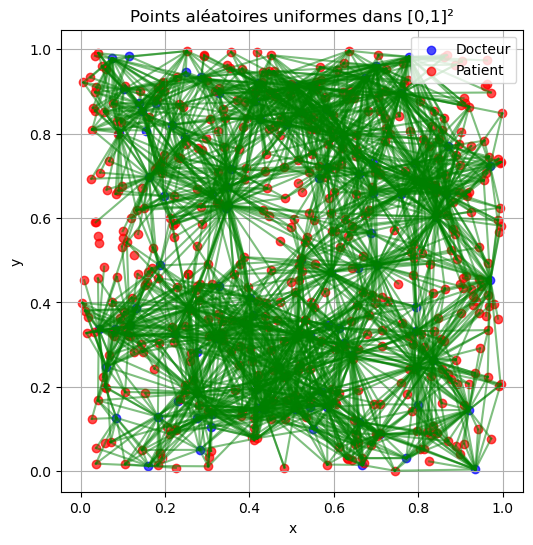

In [703]:
#On représente les Yij sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        if lien[i,j] == 1:
            plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [704]:
#On va maintenant faire la regression de Yij sur Xij, alpha_i et psi_j
model = LogisticRegression()
model.fit(matrice_distance.reshape(-1,1),lien.reshape(-1,1))
y_pred = model.predict(lien.reshape(-1,1))

/opt/conda/lib/python3.12/site-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [705]:
x = sm.add_constant(matrice_distance.reshape(-1,1))
model = sm.Probit(lien.reshape(-1,1), x)
result = model.fit()
print(result.summary())
proba= result.predict(x)
print(proba)
y_pred = (proba >= 0.5).astype(int)
y_pred

Optimization terminated successfully.
         Current function value: 0.081375
         Iterations 11
                          Probit Regression Results                           
Dep. Variable:                      y   No. Observations:                50000
Model:                         Probit   Df Residuals:                    49998
Method:                           MLE   Df Model:                            1
Date:                Fri, 11 Apr 2025   Pseudo R-squ.:                  0.6783
Time:                        14:46:31   Log-Likelihood:                -4068.7
converged:                       True   LL-Null:                       -12646.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5022      0.049     51.461      0.000       2.407       2.598
x1           -17.0100      0

array([0, 0, 0, ..., 0, 0, 0], shape=(50000,))

In [706]:
#On regarde la distance entre la prédiction et la réalité
mse = mean_squared_error(lien.reshape(-1,1), y_pred)
mse

0.036

In [707]:
patient_ids = np.repeat(np.arange(nombre_patient), nombre_docteur)
doctor_ids = np.tile(np.arange(nombre_docteur), nombre_patient)

df = pd.DataFrame({
    'patient_id': patient_ids,
    'doctor_id': doctor_ids,
    'distance': matrice_distance.flatten(),
    'link': lien.flatten()
})
df

,patient_id,doctor_id,distance,link
0,0,0,0.743581,0.0
1,0,1,0.796172,0.0
2,0,2,0.509652,0.0
3,0,3,0.111288,1.0
4,0,4,0.599267,0.0
...,...,...,...,...
49995,499,95,0.833863,0.0
49996,499,96,0.694150,0.0
49997,499,97,0.429442,0.0
49998,499,98,0.391069,0.0


### **Application de la fiche**

In [708]:
import statsmodels.formula.api as smf

model = smf.ols("link ~ distance + C(patient_id) + C(doctor_id)", data=df).fit()
print(model.summary())

PatsyError: Error evaluating factor: TypeError: 'numpy.ndarray' object is not callable
    link ~ distance + C(patient_id) + C(doctor_id)
                                      ^^^^^^^^^^^^

In [ ]:
mse = mean_squared_error(lien.reshape(-1,1), model.predict(df))
mse

0.07539117269440766

In [ ]:
!pip install linearmodels

In [ ]:
print(df.columns)

Index(['patient_id', 'doctor_id', 'distance', 'link'], dtype='object')


In [ ]:
from linearmodels.panel import PanelOLS
import pandas as pd
df_2 = df.set_index(['patient_id', 'doctor_id'])
mod = PanelOLS.from_formula('link ~ 1 + distance + EntityEffects + TimeEffects', data=df_2)
res = mod.fit()
y_pred = res.predict().fitted_values

AttributeError: 'PanelOLS' object has no attribute 'summary'

In [ ]:
mse = mean_squared_error(lien.reshape(-1,1), y_pred)
mse

0.09675982446523058

### **On génère Y = DY\* **

In [710]:
y_etoile = np.zeros((nombre_patient, nombre_docteur))

for j in range(nombre_docteur):
    for i in range(nombre_patient):
        y_etoile[i,j] = 0.30-2*matrice_distance[i,j]-alpha[i]+psi[j]+np.random.normal(0,1)
y_etoile

array([[-1.19021944e+00, -1.00276374e+00,  4.27494257e-03, ...,
        -2.48677417e+00,  2.98153670e-04, -1.57896382e+00],
       [ 2.91478190e-01, -1.85089727e+00, -1.81131949e+00, ...,
         6.81709486e-01, -4.35176818e-01, -1.10109802e+00],
       [-1.50769019e+00,  8.63721717e-02, -2.69197241e-01, ...,
         1.15145785e+00, -8.74856553e-01, -6.68294913e-01],
       ...,
       [-6.41319768e-01, -2.06290064e+00, -1.58985989e+00, ...,
        -2.00122953e+00,  1.35622355e-01, -1.41276027e+00],
       [-1.47050038e+00, -2.99450780e+00, -5.80625830e-02, ...,
        -1.71146185e+00, -1.59865125e+00, -1.55662884e+00],
       [-1.87528781e+00,  5.87650849e-01, -1.13312308e+00, ...,
        -1.45842005e+00,  1.59582471e+00,  9.84477539e-01]],
      shape=(500, 100))

In [711]:
y = np.zeros((nombre_patient, nombre_docteur))

for i in range(nombre_patient):
    for j in range(nombre_docteur):
        y[i,j] = y_etoile[i,j]*lien[i,j]
y

array([[-0.        , -0.        ,  0.        , ..., -0.        ,
         0.        , -0.        ],
       [ 0.        , -0.        , -0.        , ...,  0.        ,
        -0.        , -0.        ],
       [-0.        ,  0.        , -0.        , ...,  0.        ,
        -0.        , -0.        ],
       ...,
       [-0.        , -0.        , -1.58985989, ..., -0.        ,
         0.13562235, -0.        ],
       [-0.        , -0.        , -0.        , ..., -0.        ,
        -0.        , -0.        ],
       [-0.        ,  0.        , -0.        , ..., -0.        ,
         0.        ,  0.        ]], shape=(500, 100))

In [712]:
X_tild = np.zeros((nombre_patient*nombre_docteur,2))
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        X_tild[i*nombre_docteur+j][0]=1
        X_tild[i*nombre_docteur+j][1]=matrice_distance[i,j]

X_tild

array([[1.        , 0.74358135],
       [1.        , 0.79617155],
       [1.        , 0.50965246],
       ...,
       [1.        , 0.42944211],
       [1.        , 0.39106935],
       [1.        , 0.61293827]], shape=(50000, 2))

In [713]:
A_tild = np.zeros((nombre_patient*nombre_docteur,nombre_patient))
for i in range(nombre_patient*nombre_docteur):
        n = i//nombre_docteur
        A_tild[i][n]=1

print(A_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [ ]:
B_tild = np.zeros((nombre_patient*nombre_docteur,nombre_docteur))
for i in range(nombre_patient*nombre_docteur):
        n = i%nombre_docteur
        if n<nombre_docteur:
                B_tild[i][n]=1
print(B_tild)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 0. 1. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]]


In [730]:
Y_etoile = np.zeros((nombre_patient*nombre_docteur,1))

for j in range(nombre_docteur):
    for i in range(nombre_patient):
        Y_etoile[i*j][0] = 0.3-2*matrice_distance[i,j]-alpha[i]+psi[j]+np.random.normal(0,1)
Y_etoile

array([[-1.00097533],
       [ 0.20968624],
       [-0.93774486],
       ...,
       [ 0.        ],
       [ 0.        ],
       [ 0.        ]], shape=(50000, 1))

In [731]:
S = np.zeros((int(lien.sum()),nombre_patient*nombre_docteur))
l=0
while l<int(lien.sum()):
    for i in range(nombre_patient):
        for j in range(nombre_docteur):
            if lien[i,j] == 1:
                S[l][i*nombre_docteur+j] = 1
                l+=1

S

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], shape=(3486, 50000))

In [732]:
A = S@A_tild
B = S@B_tild
X = S@X_tild
Y = S@Y_etoile

In [733]:
G = np.hstack([A, B])

In [734]:
C = np.eye(int(lien.sum()))-G@G.T

In [735]:
Beta_chapeau = np.linalg.inv(X.T@C@X)@X.T@C@Y

In [736]:
Effets_fixes = (np.linalg.pinv(G.T@G))@(G.T@(Y-X@Beta_chapeau))

In [737]:
alpha_chapeau = Effets_fixes[:nombre_patient]

In [738]:
psi_chapeau = Effets_fixes[nombre_patient:]

In [739]:
Beta_chapeau

array([[-0.21602478],
       [-0.5265732 ]])

In [ ]:
D_chapeau = np.zeros((nombre_patient,nombre_docteur))
for j in range(nombre_docteur):
    for i in range(nombre_patient):
        D_chapeau[i,j] = 1 if Beta_chapeau[0]+Beta_chapeau[1]*matrice_distance[i,j]+alpha_chapeau[i]+psi_chapeau[j]>0 else 0

In [741]:
D_chapeau

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 1., ..., 0., 1., 1.],
       [0., 0., 0., ..., 0., 1., 0.]], shape=(500, 99))

/tmp/ipykernel_4204/3839871106.py:8: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k-" (-> color='k'). The keyword argument will take precedence.
  plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")


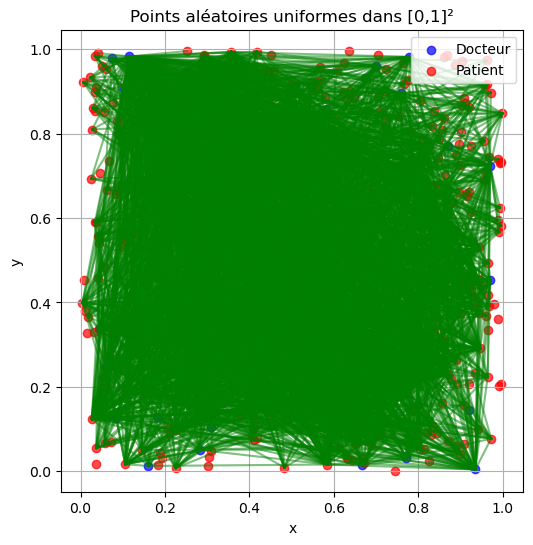

In [ ]:
#On représente les Yij sur un graphe
plt.figure(figsize=(6, 6))
plt.scatter(position_docteur[0], position_docteur[1], color='blue', alpha=0.7, label="Docteur")
plt.scatter(position_patient[0], position_patient[1], color='red', alpha=0.7, label="Patient")
for i in range(nombre_patient):
    for j in range(nombre_docteur):
        if D_chapeau[i,j] == 1:
            plt.plot([position_docteur[0][j], position_patient[0][i]], [position_docteur[1][j], position_patient[1][i]], 'k-',alpha=0.5,color="green")
plt.title("Points aléatoires uniformes dans [0,1]²")
plt.xlabel("x")
plt.ylabel("y")
plt.grid(True)
plt.axis('square')
plt.legend()
plt.show()

In [743]:
int(((lien-D_chapeau)**2).sum())/(nombre_patient*nombre_docteur)

ValueError: operands could not be broadcast together with shapes (500,100) (500,99) 